In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

##### player Sehwag's stats

In [2]:
sehwag = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Datasets\sehwag.csv')
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,01-Apr-99,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14-Dec-00,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25-Mar-01,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27-Jun-01,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30-Jun-01,ODI # 1731


In [3]:
sehwag["Runs"].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

In [4]:
# calculating percentile for each quartile
sp_25 = np.percentile(sehwag["Runs"], 25)
sp_50 = np.percentile(sehwag["Runs"], 50)
sp_75 = np.percentile(sehwag["Runs"], 75)
savg_runs = sehwag['Runs'].mean()
print(f'25th percentile is {sp_25}\n50th percentile (median) is {sp_50}\n75th percentile is {sp_75}\nAverage of all runs is {savg_runs}')

25th percentile is 8.0
50th percentile (median) is 23.0
75th percentile is 46.0
Average of all runs is 33.76734693877551


insight: more than 50% of the time, Sehwag scores in the range of 38 runs<br>
however since average runs is very far from median, there are outliers seen on higher side of runs

In [5]:
iqr_sehwag = sp_75 - sp_25                                            # IQR = Q3-Q1
srange = (sehwag["Runs"].max() - sehwag["Runs"].min())
print(f'IQR is {iqr_sehwag}\nrange of runs is {srange}')

IQR is 38.0
range of runs is 219


insight: there are outliers in data as Range is very far from IQR

<Axes: xlabel='Runs'>

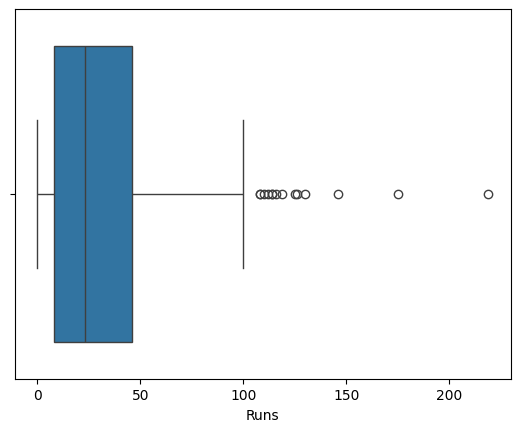

In [6]:
sns.boxplot(data=sehwag["Runs"], orient="h")                        # plotting the runs horizontally

In [7]:
slower = sp_25 - 1.5*(iqr_sehwag)                                   # lower limit = Q1 - 1.5 * IQR
supper = sp_75 + 1.5*(iqr_sehwag)                                   # upper limit = Q3 + 1.5 * IQR
print(f'lower limit {slower}\nUpper limit {supper}')

lower limit -49.0
Upper limit 103.0


discarding the lower limit value as runs scored cannot be negative

In [8]:
outliers_sehwag = sehwag[sehwag["Runs"]>supper]                   # all the values greater than upper is outlier
outlier_perc = round(len(outliers_sehwag)/len(sehwag)*100,2)
print(f'There are {outlier_perc}% of outlier values wrt the runs feature')

There are 5.71% of outlier values wrt the runs feature


<font color='orange'>**Conclusion**:</font>

Here we can observe that **5.7% values from the dataset are outliers**.  

This means we can conclude that <font color='purple'>5.7 or ~6% times Sehwag has scored more than the IQR which is 38 runs</font>


##### player Dravid's stats

In [9]:
dravid = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Datasets\dravid.csv')
dravid.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,3,-,4,0,0,75.00,4,caught,1,NaN,v Sri Lanka,Singapore,03-Apr-96,ODI # 1089
1,4,-,7,0,0,57.14,4,run out,1,NaN,v Pakistan,Singapore,05-Apr-96,ODI # 1091
2,3,-,5,0,0,60.00,5,caught,2,NaN,v Pakistan,Sharjah,12-Apr-96,ODI # 1094
3,11,28,21,0,0,52.38,8,caught,2,NaN,v South Africa,Sharjah,14-Apr-96,ODI # 1097
4,22,21,15,3,0,146.66,6,not out,1,NaN,v England,Manchester,26-May-96,ODI # 1104


In [10]:
dravid.describe()

,Runs,BF,4s,6s,SR,Pos,Inns,Unnamed: 9
count,318.000000,318.000000,318.000000,318.000000,318.00000,318.000000,318.000000,0.0
mean,34.242138,48.066038,2.987421,0.132075,66.89434,3.839623,1.481132,NaN
std,29.681822,34.286583,2.930289,0.429411,36.72385,1.107503,0.500431,NaN
min,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,NaN
25%,10.000000,19.000000,1.000000,0.000000,46.75750,3.000000,1.000000,NaN
50%,26.000000,41.000000,2.000000,0.000000,66.45500,4.000000,1.000000,NaN
75%,54.000000,72.000000,4.000000,0.000000,81.98500,5.000000,2.000000,NaN
max,153.000000,153.000000,17.000000,3.000000,350.00000,8.000000,2.000000,NaN


In [11]:
dp_25 = np.percentile(dravid['Runs'],25)
dp_50 = np.percentile(dravid['Runs'],50)
dp_75 = np.percentile(dravid['Runs'],75)
davg_runs = dravid['Runs'].mean()
print(f'25th percentile is {dp_25}\n50th percentile (median) is {dp_50}\n75th percentile is {dp_75}\nAverage of all runs is {davg_runs}')

25th percentile is 10.0
50th percentile (median) is 26.0
75th percentile is 54.0
Average of all runs is 34.242138364779876


In [12]:
iqr_dravid = dp_75-dp_25
drange = dravid['Runs'].max()-dravid['Runs'].min()
print(f'IQR is {iqr_dravid}\nNormal range is {drange}')

IQR is 44.0
Normal range is 153


<Axes: xlabel='Runs'>

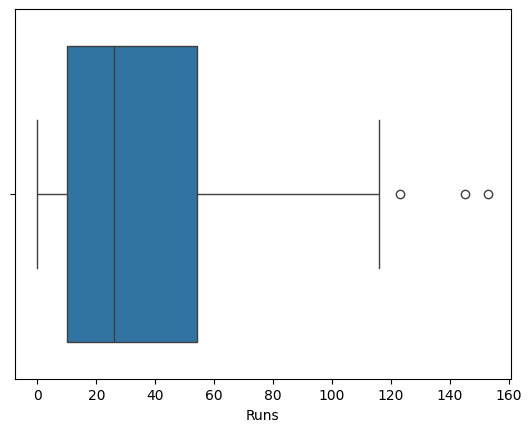

In [13]:
sns.boxplot(data=dravid["Runs"], orient="h")

In [14]:
dlower_limit = dp_25 - 1.5*iqr_dravid
dupper_limit = dp_75 + 1.5*iqr_dravid
print(f'Lower limit is {dlower_limit}\nUpper limit is {dupper_limit}')

Lower limit is -56.0
Upper limit is 120.0


lower limit can be discarded since runs cannot be negative

In [15]:
outlier_d = dravid[dravid['Runs']>dupper_limit]
outlier_dperc = round(len(outlier_d)/len(dravid)*100,2)
print(f'There are {outlier_dperc}% of outlier values wrt the runs feature')

There are 0.94% of outlier values wrt the runs feature


### <font color='orange'>**Conclusion**</font>  

Here we can observe that **0.9% values from the dataset are outliers**.  

This means we can conclude that 0.9% times Dravid has scored more than the IQR which is 44 runs<br>

So we can conclude that in <font color='purple'>Sehwag case there is **6% outliers** and in Dravid's case there are only **0.9% outliers**</font>  

which shows that "<font color='orange'>**Dravid was more consistent than Sehwag**"</font>  

To calculate the standard deviation to measure the amount of variation or dispersion in runs scored by Sehwag and Dravid.

In [16]:
s_std = np.std(sehwag['Runs'])
d_std = np.std(dravid['Runs'])
print(f'std deviation of runs scored by Sehwag {s_std}\nstd deviation of runs scored by Dravid {d_std}')

std deviation of runs scored by Sehwag 34.73830672594385
std deviation of runs scored by Dravid 29.635116182506632


Lower standard deviation indicates less variability in the batsman's performance.

<font color='orange'>**Conclusion:**</font>  


Dravid has a lower standard deviation compared to Sehwag.  

This suggests that **Dravid's run scores are more consistent or less variable than Sehwag's**.   

  - In other words, Dravid tends to have a more stable performance in terms of runs compared to Sehwag, who shows more variability in his run scores.

<br>  

So, from both **IQR method** and measuring **Standard Deviation** we can conclude that <font color='purple'>Dravid is more consistent than Sehwag</font>
